
## SHAP (SHapley Additive exPlanations)

* Case: An AI model makes unjust decision on the basis of a bias
* Laws like EU law is seeking to pass legislation requiring AI systems to meet certain transparency requirements
* Human beings must be able to audit decisions made by a model in order to determine what factors lead to a given prediction
* Some models are interpretable such as: Linear Regression, Logistic Regression, Naive Bayes, Decision Trees and other tree based models




## Linear Models

* The coefficients can be interpreted as a  type of feature explanation
* Boston focuses on features of air quality that may have affected the median prices in the 1970s housing market of the Boston Standard Metropolitan Statistical Area. It had a bias issue, however.
* A hedonic housing price affected by air quality, for example, can be affected by the feature of air pollution; more pollution would intuitively reduce the price of a house, all other parameters remaining fixed. 
* It appears reasonable, under this assumption, that one could analyze multiple features of air pollution to see how prices change as each component of pollution changes.
*  questions come in when other variables are presented as “standard” to a model like this, outside of the scope of the intended analysis.
* Study by Harrison and Rubinfeld
* demographics, CRIM: Crime rate by town. (FBI (1970))


/Users/user/opt/anaconda3/envs/CIVS_py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

<BarContainer object of 13 artists>

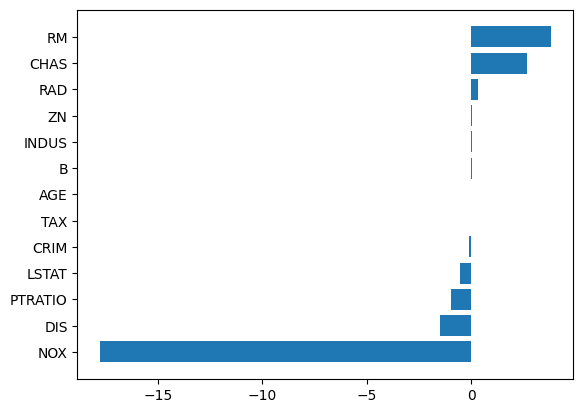

In [1]:

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

lr = LinearRegression()
lr.fit(X, y)

## We plot the weights associated with each feature

sorted_idx = lr.coef_.argsort()
plt.barh(boston.feature_names[sorted_idx], lr.coef_[sorted_idx])



* Looking at the bar chart,  a small change in the nitric oxides concentration (NOX) produces the largest change (negative) in the price of a house relative to all other features. 
* However, in reality the coefficient is larger than the rest because of the nature of the data. 



<BarContainer object of 13 artists>

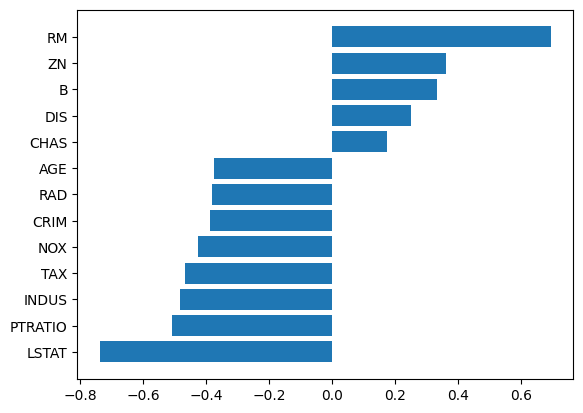

In [2]:

from sklearn.feature_selection import r_regression
result = r_regression(X, y)
sorted_idx = result.argsort()

plt.barh(boston.feature_names[sorted_idx], result[sorted_idx])



* As we can see, the LSTAT feature has the largest influence on the house price.



## XGBoost


In [3]:

from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target


/Users/user/opt/anaconda3/envs/CIVS_py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [4]:

model = XGBRegressor()
model.fit(X, y)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<BarContainer object of 13 artists>

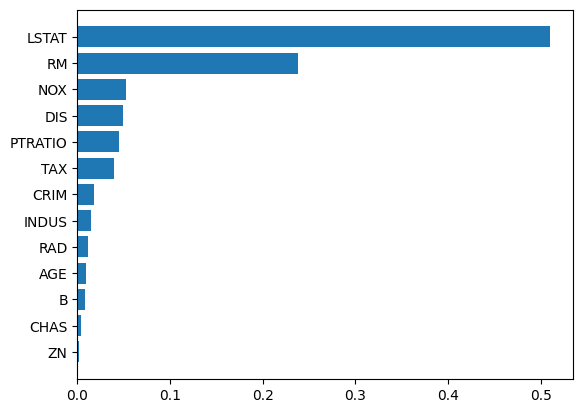

In [5]:

sorted_idx = model.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], model.feature_importances_[sorted_idx])



* As we can see, the percentage of lower class people (LSTAT) in the area had the greatest impact on the model’s prediction.



## SHAP

* SHapley Additive exPlanations is a "game theoretic" method to explain the output of AI models
